In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mem_res_path = "results/results.csv"
perplexity_masked = "results/perp_calc_masked.csv"
perplexity_unmasked = "results/perp_calc_unmasked.csv"

In [15]:
mem_df = pd.read_csv(mem_res_path)
perp_m_df = pd.read_csv(perplexity_masked)
perp_um_df = pd.read_csv(perplexity_unmasked)

In [8]:
mem_df.head()

,checkpoint,percentage_from_total_masked,percentage_from_seen_masked,emails_leaked_masked,percentage_from_total_original,percentage_from_seen_original,emails_leaked_original
0,10,0.008549,0.088261,2,0.042746,0.171174,10
1,20,0.017098,0.090539,4,0.081217,0.201634,19
2,30,0.017098,0.059286,4,0.102590,0.196996,24
3,40,0.029922,0.077735,7,0.132513,0.214088,31
4,50,0.029922,0.061328,7,0.162435,0.233243,38


In [10]:
emails_leaked_m = mem_df['emails_leaked_masked'].to_list()
emails_leaked_um = mem_df['emails_leaked_original'].to_list()
percentage_reduce = []

for i in range(len(emails_leaked_m)):
    num_leak_m = emails_leaked_m[i]
    num_leak_um = emails_leaked_um[i]
    perc_reduce = -1 * ((num_leak_m - num_leak_um)/num_leak_um) * 100
    percentage_reduce.append(perc_reduce)

In [18]:
perp_um_df.head()

,checkpoint,mean_perplexity
3,10,1168.112503
7,20,1320.437121
10,30,1357.508063
13,40,1440.557614
16,50,1477.163551


In [17]:
perp_m_df = perp_m_df.sort_values('checkpoint')
perp_um_df = perp_um_df.sort_values('checkpoint')

perp_m_df.head()

,checkpoint,mean_perplexity
3,10,1174.982519
7,20,1326.762644
10,30,1380.807458
13,40,1529.324976
16,50,1514.390550


In [19]:
perps_m = perp_m_df['mean_perplexity'].to_list()
perps_um = perp_um_df['mean_perplexity'].to_list()

percentage_increase = []

for i in range(len(perps_m)):
    perpm = perps_m[i]
    perpum = perps_um[i]
    perc_inc = ((perpm - perpum)/perpum)*100
    percentage_increase.append(perc_inc)

    

In [24]:
percentage_increase = percentage_increase[:-1]

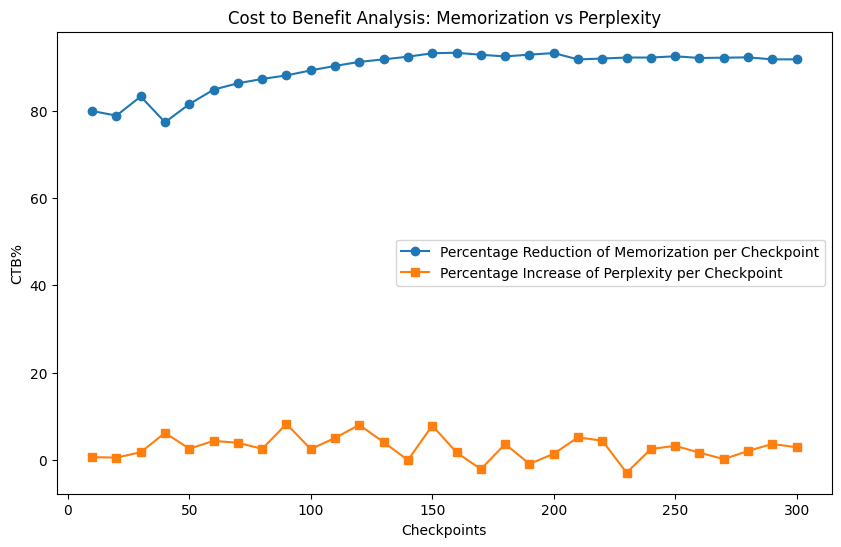

In [25]:
ckpts = mem_df['checkpoint'].to_list()

plt.figure(figsize=(10,6))
plt.plot(ckpts, percentage_reduce, marker = 'o', label = 'Percentage Reduction of Memorization per Checkpoint')
plt.plot(ckpts, percentage_increase, marker = 's', label = 'Percentage Increase of Perplexity per Checkpoint')

plt.xlabel('Checkpoints')
plt.ylabel('CTB%')
plt.title('Cost to Benefit Analysis: Memorization vs Perplexity')
plt.legend()
plt.show()

In [27]:
percentage_reduce

[80.0,
 78.94736842105263,
 83.33333333333334,
 77.41935483870968,
 81.57894736842105,
 84.90566037735849,
 86.36363636363636,
 87.35632183908046,
 88.17204301075269,
 89.32038834951457,
 90.35087719298247,
 91.26984126984127,
 91.85185185185185,
 92.46575342465754,
 93.25153374233128,
 93.37349397590361,
 92.89940828402366,
 92.52873563218391,
 92.93478260869566,
 93.29896907216495,
 91.83673469387756,
 92.03980099502488,
 92.27053140096618,
 92.27053140096618,
 92.55813953488372,
 92.16589861751152,
 92.23744292237443,
 92.3076923076923,
 91.8552036199095,
 91.8552036199095]

In [28]:
sum(percentage_reduce)/len(percentage_reduce)

89.43398266898704

In [29]:
sum(percentage_increase)/len(percentage_increase)

2.7799260218329636

In [30]:
percentage_increase[-1]

2.8388294023145377